In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import kruskal
from datetime import datetime


In [ ]:
shop_df = pd.read_csv('/content/shopping.csv')

In [ ]:
shop_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Preprocessing

# **1. Shopping dataframe**

In [ ]:
shop_df.shape

(12330, 18)

In the shopping dataset we have 12330 rows and 18 columns

In [ ]:
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
shop_df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


We don`t have any null values in the shopping dataset

In [ ]:
shop_df[shop_df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [ ]:
shop_df.drop_duplicates(inplace=True)

In [ ]:
shop_df.duplicated().sum()

0

These are duplicated values in the shopping dataset. Removed it for clear analysis.


### - outliers

In [ ]:
numerical_col = shop_df.select_dtypes(include=np.number).columns

In [ ]:
numerical_col

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

Visulizing Outliers

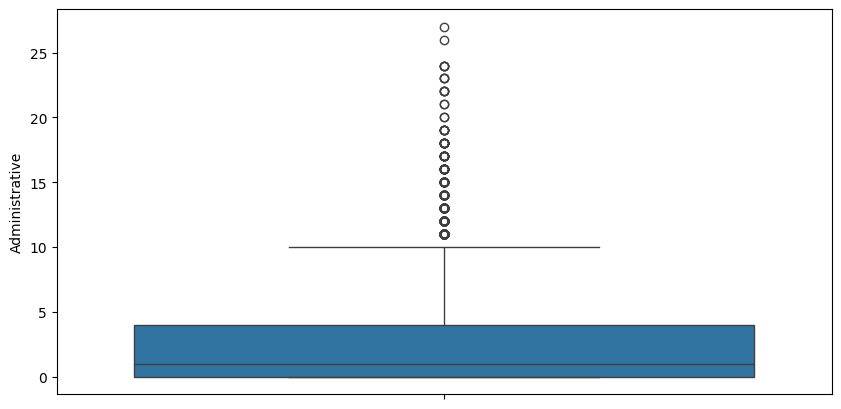

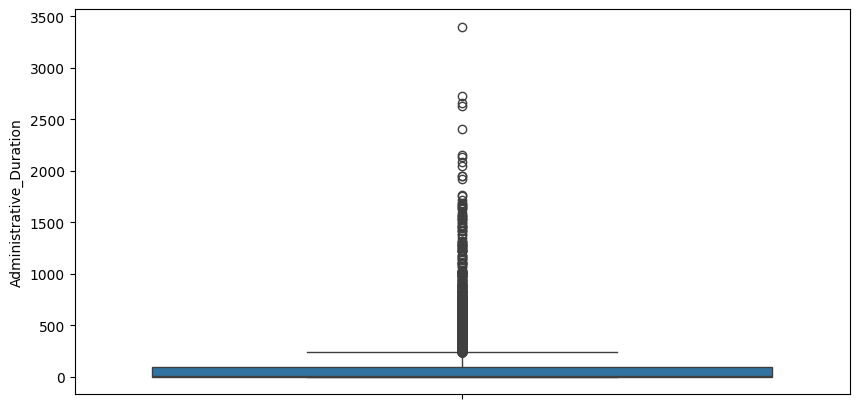

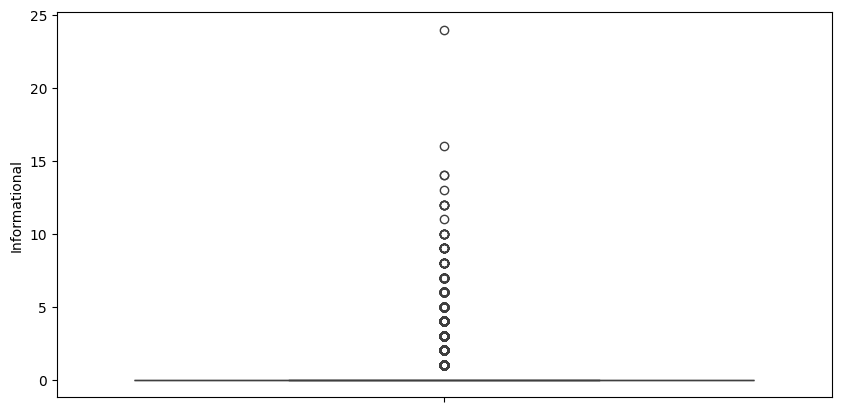

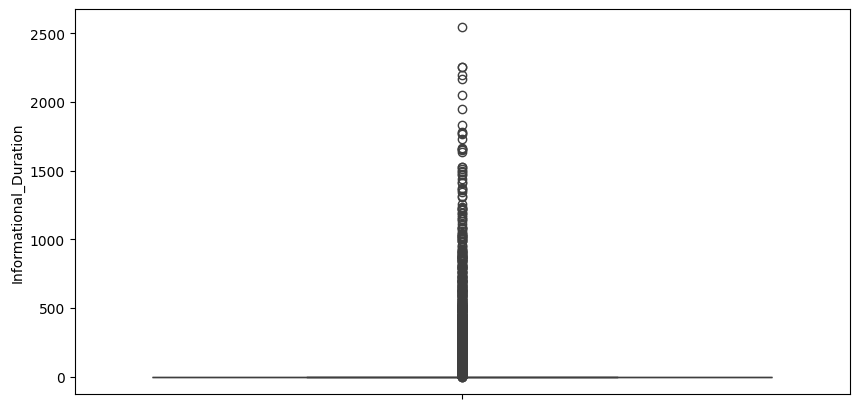

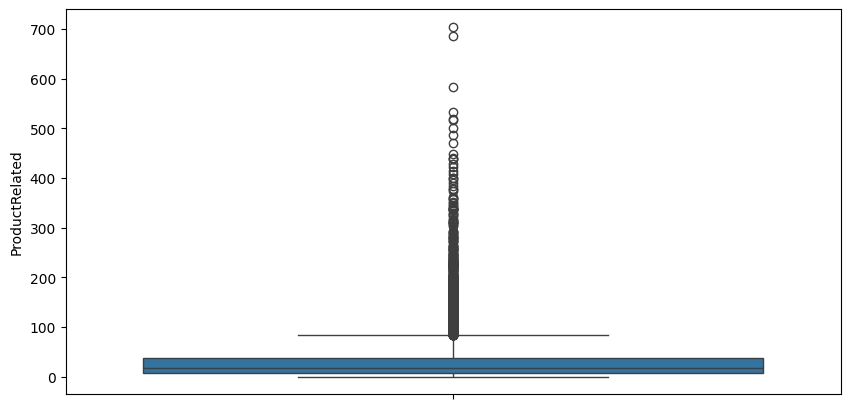

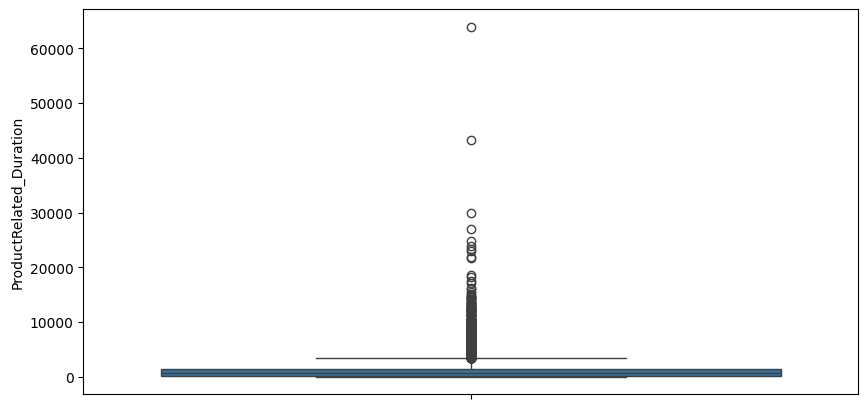

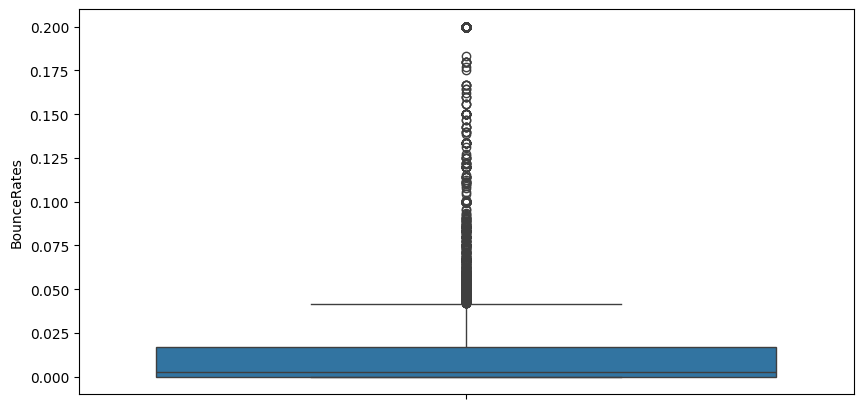

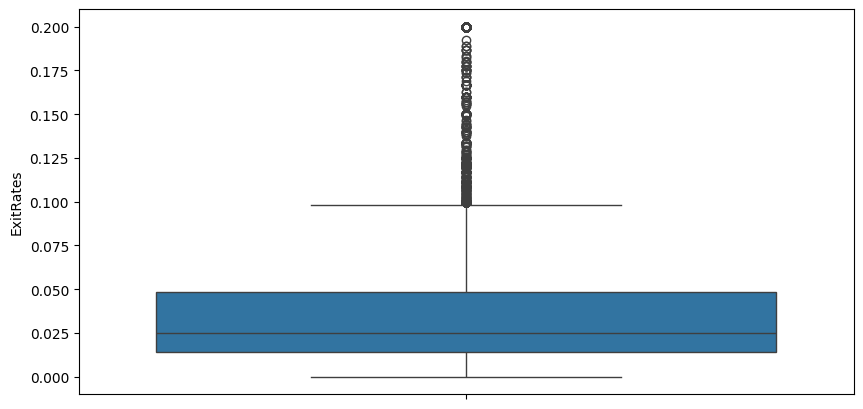

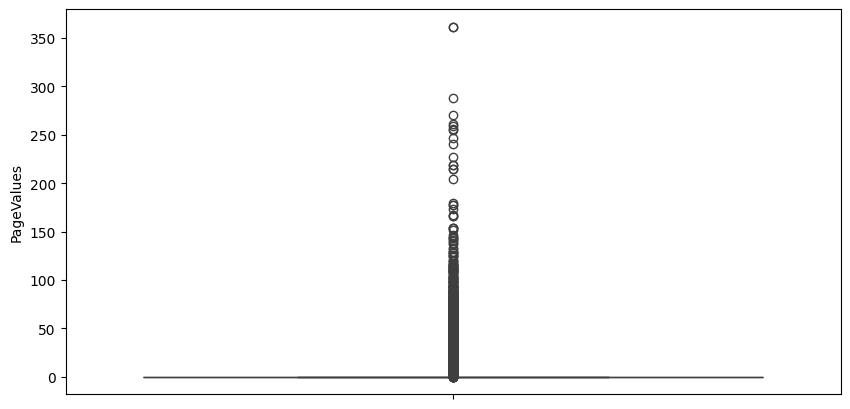

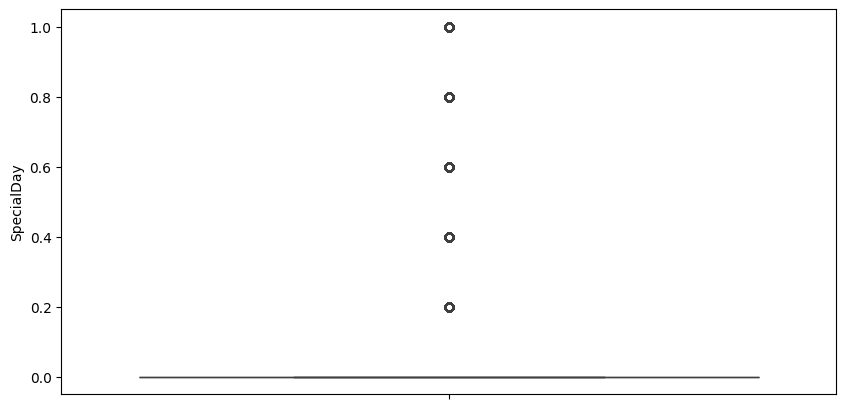

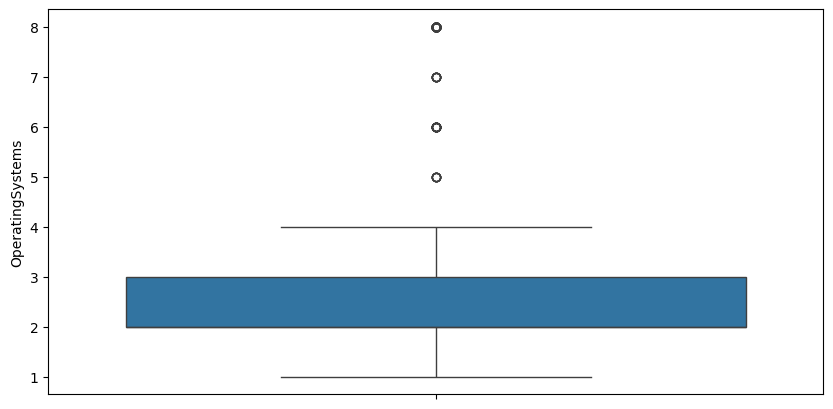

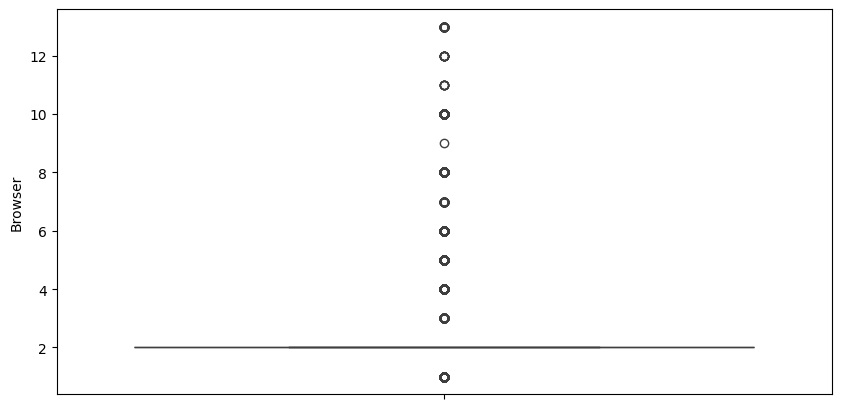

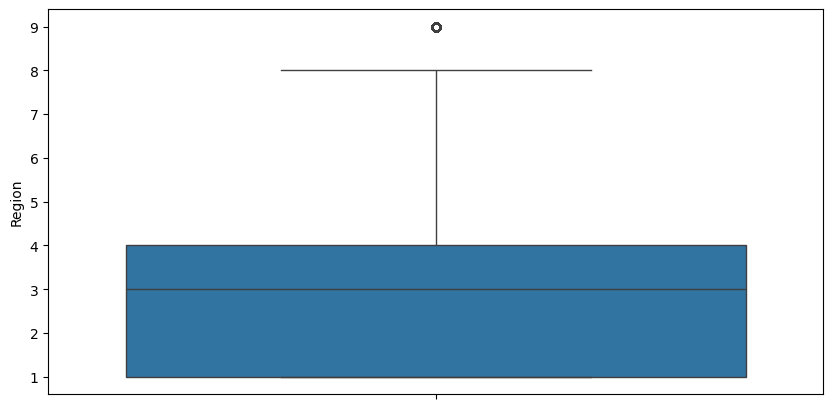

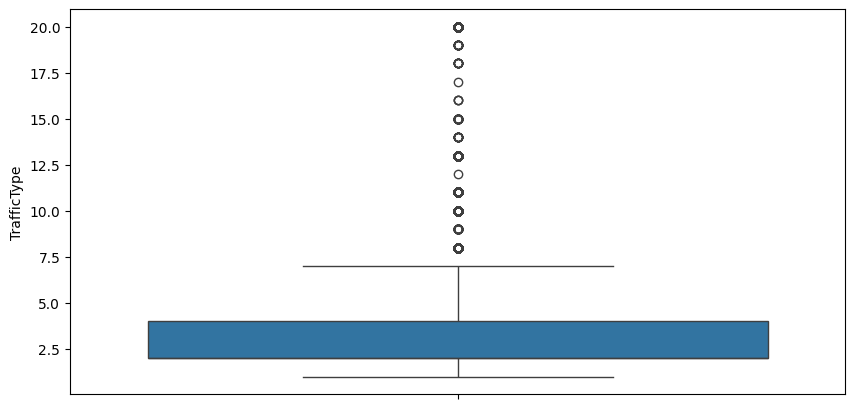

In [ ]:
for col in numerical_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(shop_df[col])
  plt.show()

**Univeriant Analysis**

---



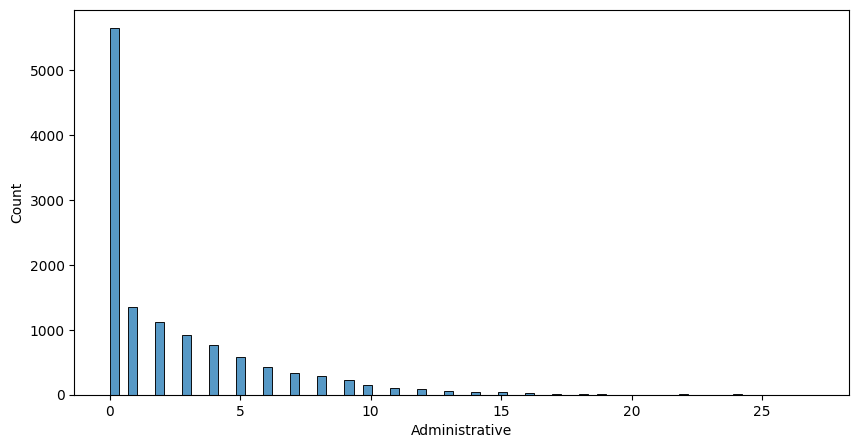

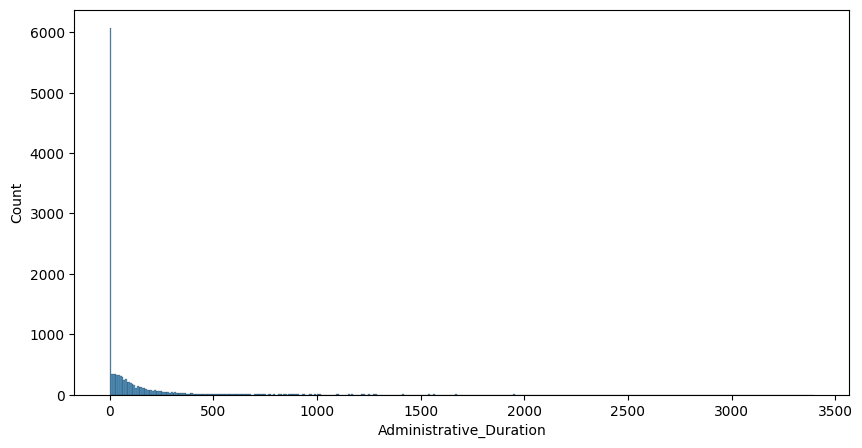

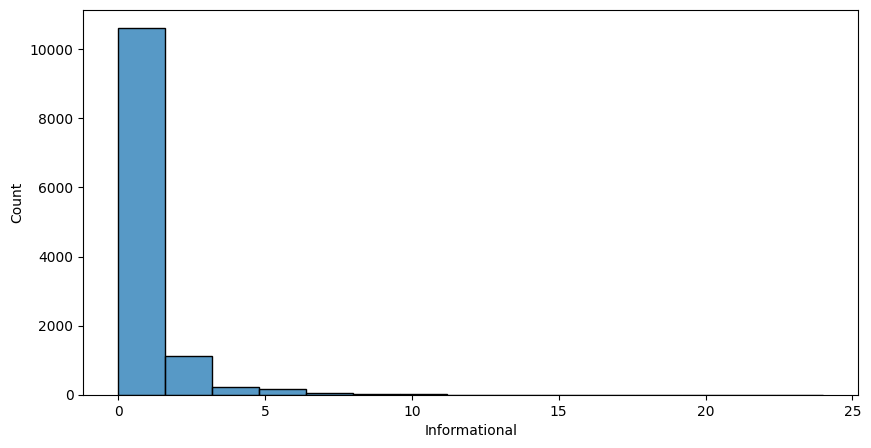

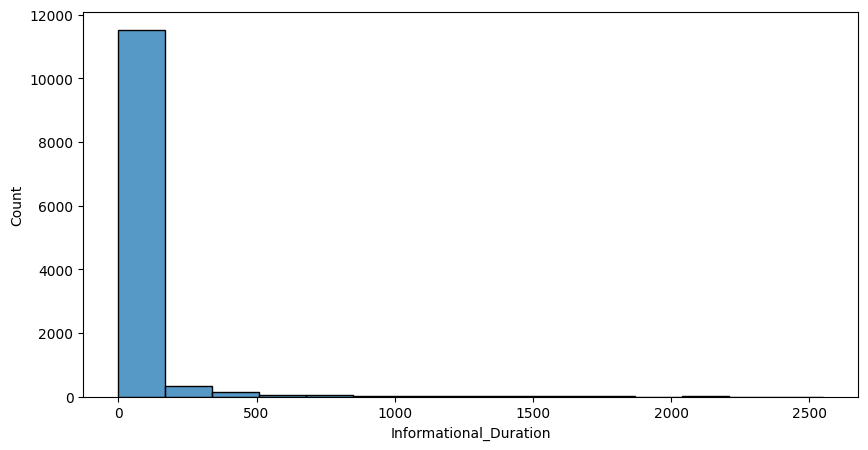

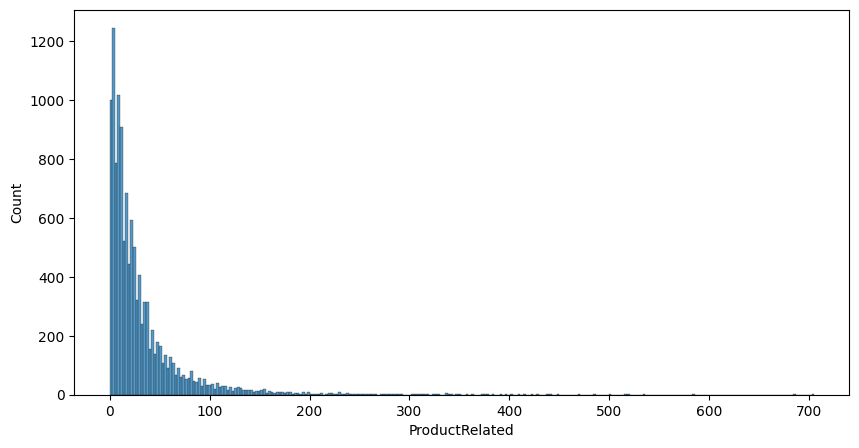

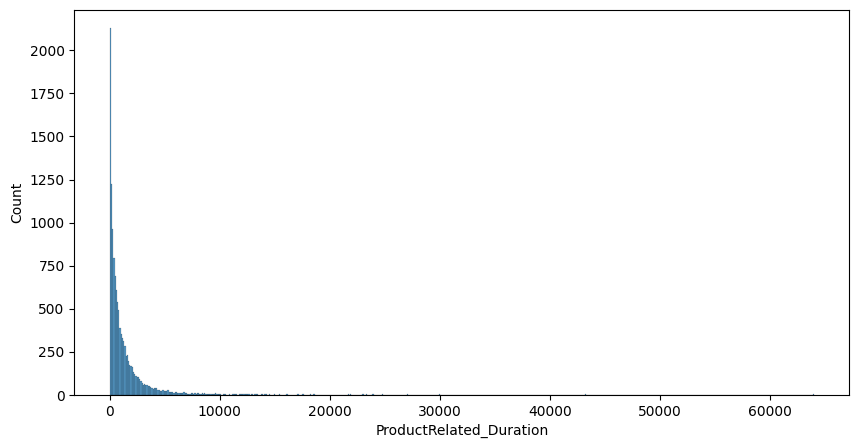

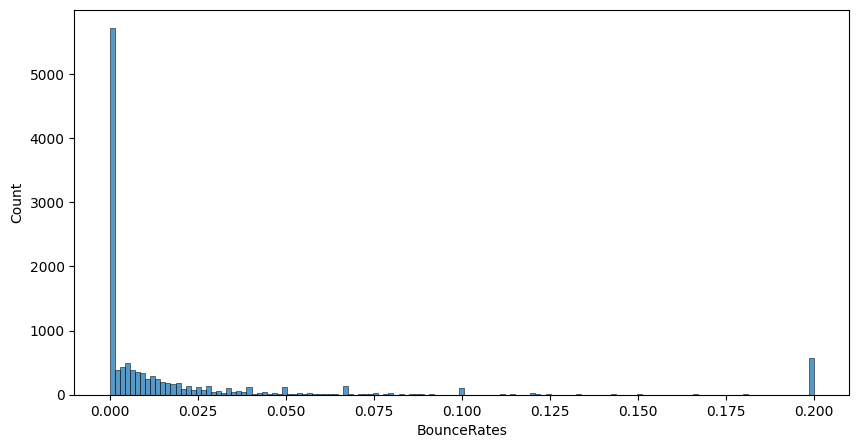

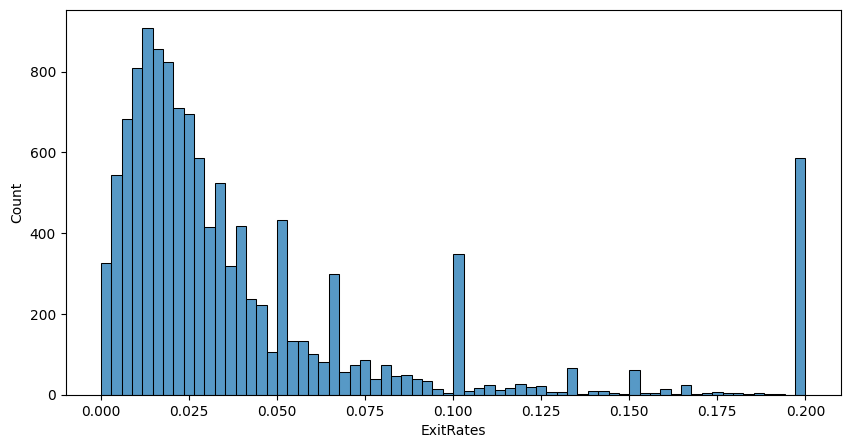

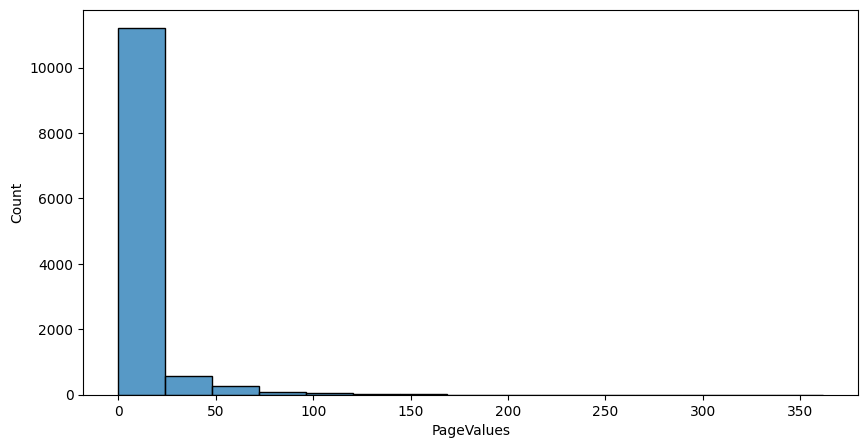

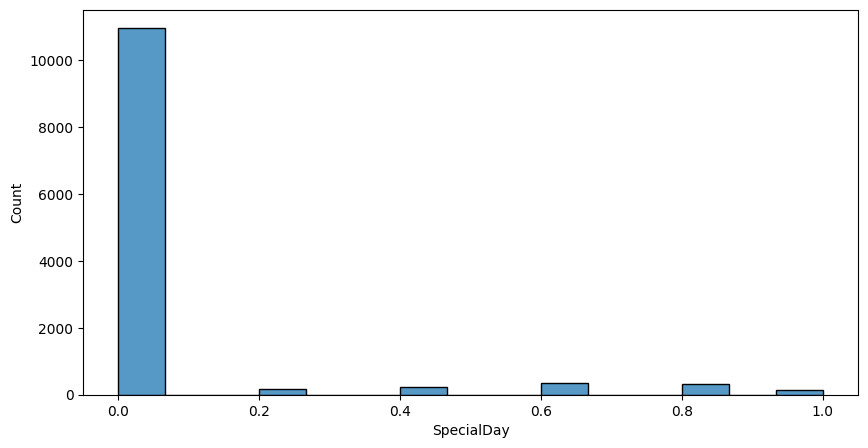

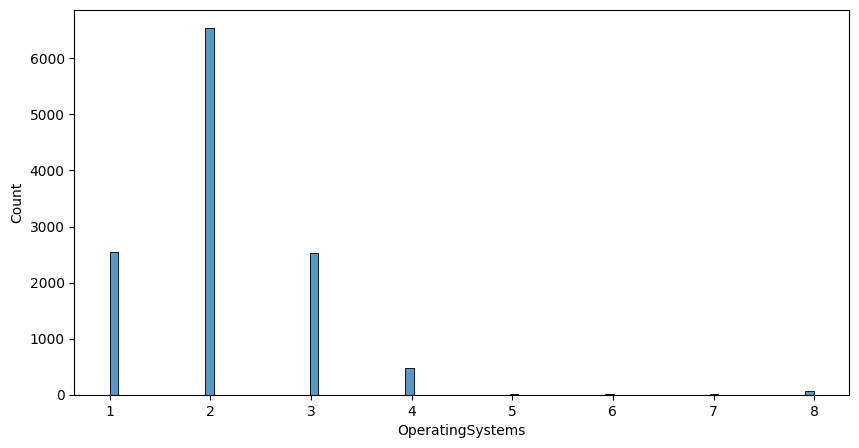

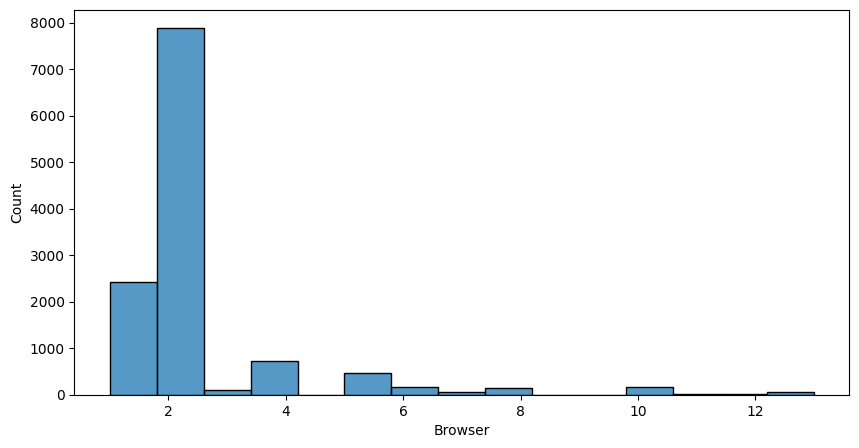

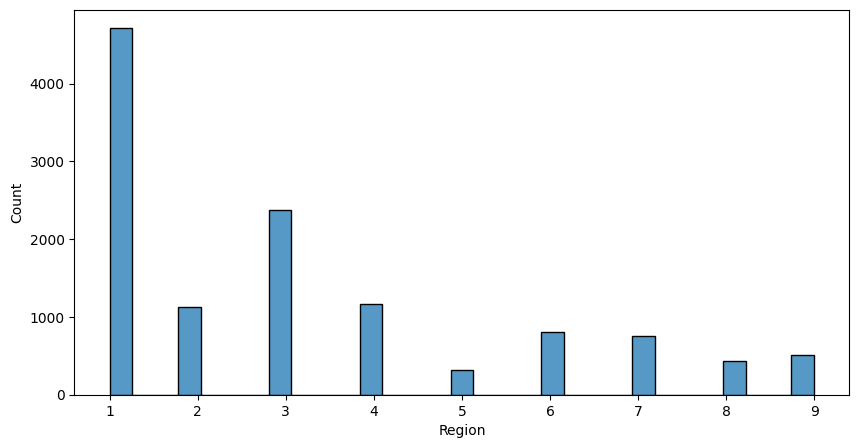

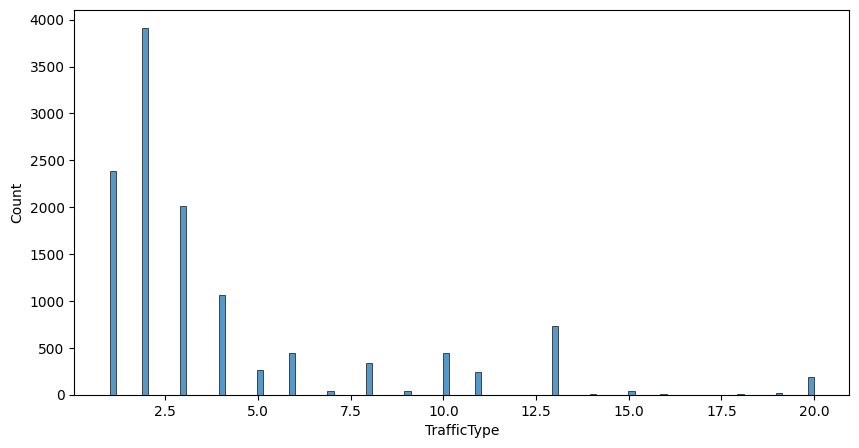

In [ ]:
for col in numerical_col:
  plt.figure(figsize=(10,5))
  sns.histplot(shop_df[col])
  plt.show()

**- Correlation Analysis**

---



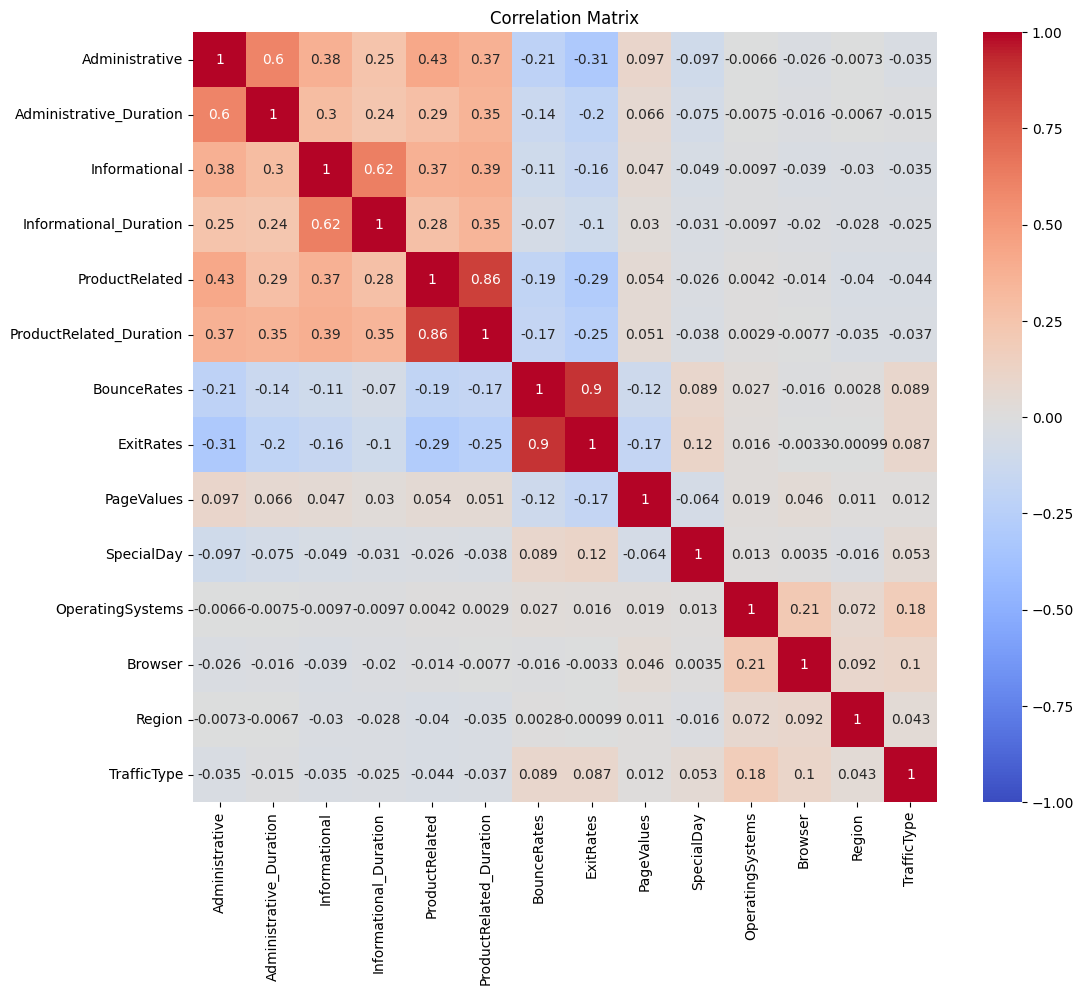

In [ ]:
correlation_matrix = shop_df[numerical_col].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**- Visualizations**

---



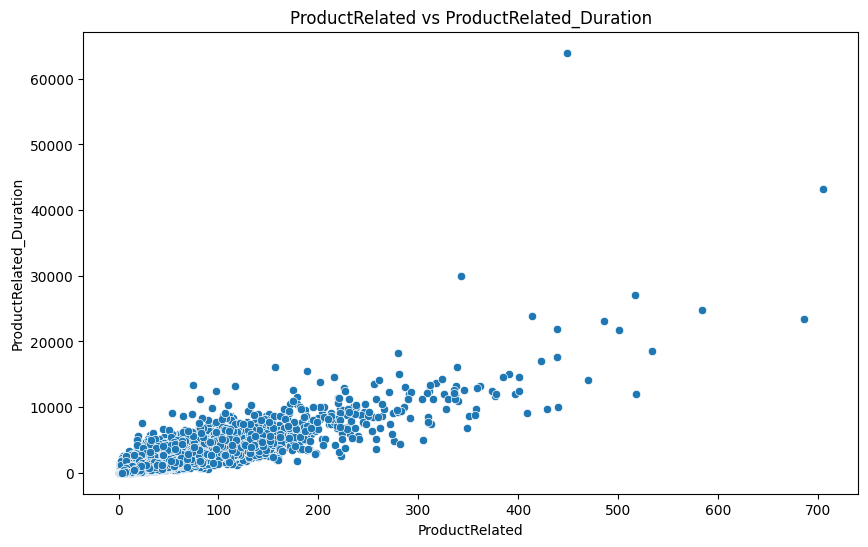

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ProductRelated', y='ProductRelated_Duration', data=shop_df)
plt.title('ProductRelated vs ProductRelated_Duration')
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated_Duration')
plt.show()


Users spending more time on product-related pages could be more likely to convert into customers. This suggests a need to optimize these pages to encourage further engagement and eventually drive conversions.

**Class Distribution**

In [ ]:
revenue_distribution = shop_df['Revenue'].value_counts(normalize = True)
revenue_distribution


,proportion
Revenue,
False,0.843671
True,0.156329


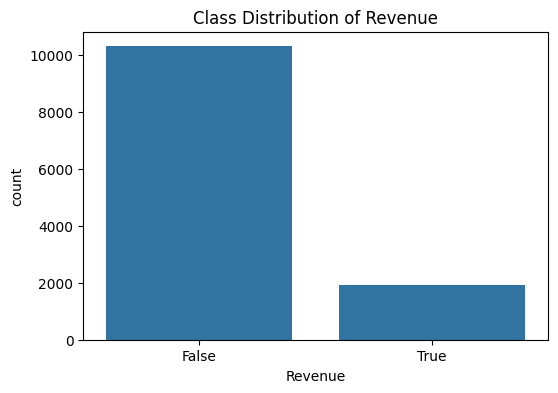

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=shop_df)
plt.title('Class Distribution of Revenue')
plt.show()


**Summarize page views, durations, and bounce/exit rates for each page category.**

---




In [ ]:
shop_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
page_summary = shop_df.groupby('ProductRelated').agg({
    'Administrative': 'sum',
    'Administrative_Duration': 'sum',
    'Informational': 'sum',
    'Informational_Duration': 'sum',
    'BounceRates': 'mean',
    'ExitRates': 'mean'
})
print(page_summary)


                Administrative  Administrative_Duration  Informational  \
ProductRelated                                                           
0                           35               847.400000             12   
1                           67              2867.450000             31   
2                          232              8854.512500             30   
3                          379             13080.666667             23   
4                          332             12124.116349             64   
...                        ...                      ...            ...   
518                          8               161.668571              0   
534                          9               444.284722              0   
584                         27               853.735949              2   
686                         20               199.456273              7   
705                         17              2629.253968             24   

                Informational_Duratio

**Analyze SpecialDay Distribution and Its Correlation with Revenue**

---



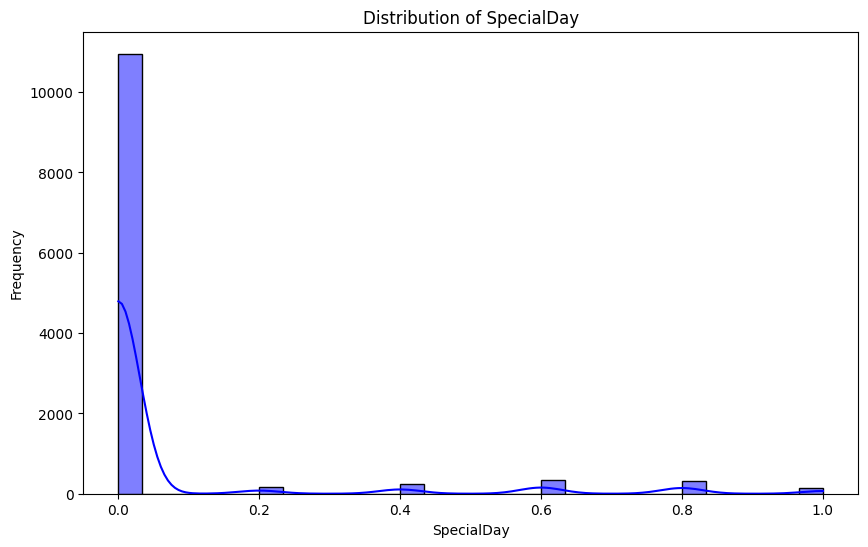

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(shop_df['SpecialDay'], bins=30, kde=True, color='blue')
plt.title('Distribution of SpecialDay')
plt.xlabel('SpecialDay')
plt.ylabel('Frequency')
plt.show()

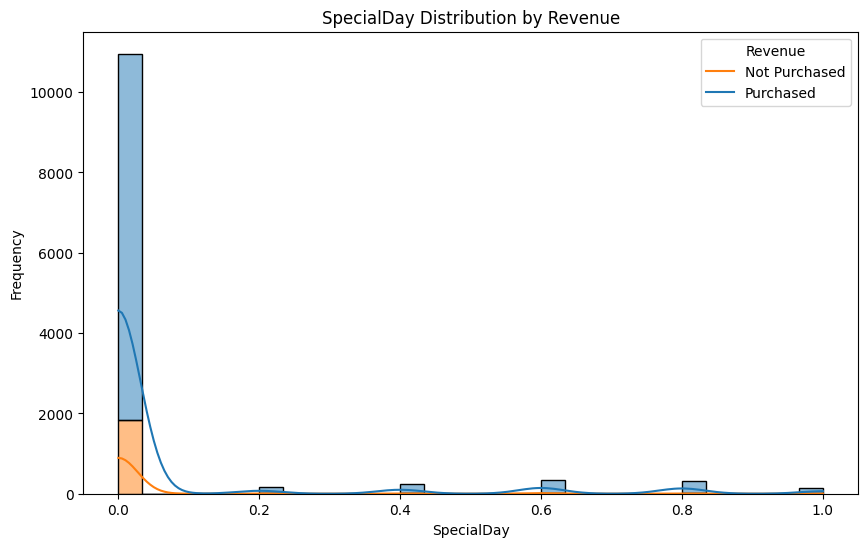

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=shop_df, x='SpecialDay', hue='Revenue', multiple='stack', bins=30, kde=True)
plt.title('SpecialDay Distribution by Revenue')
plt.xlabel('SpecialDay')
plt.ylabel('Frequency')
plt.legend(title='Revenue', labels=['Not Purchased', 'Purchased'])
plt.show()


**Generate a binary feature indicating whether the user visited all three page categories.**


---



In [ ]:
shop_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
shop_df['All_Pages_Visited'] = ((shop_df['Administrative'] > 0) &
                                (shop_df['Informational'] > 0) &
                                (shop_df['ProductRelated'] > 0)).astype(int)


In [ ]:
shop_df['All_Pages_Visited'].value_counts()

,count
All_Pages_Visited,
0,10038
1,2167


users are not exploring all content types, possibly missing critical information.

Recommendation:
Improve Cross-Linking: Ensure that there are clear and intuitive links between different types of content. For instance, product pages could link to related informational content or FAQs.

**Explore PageValues distribution and its relationship with TrafficType, VisitorType, and Region**

---



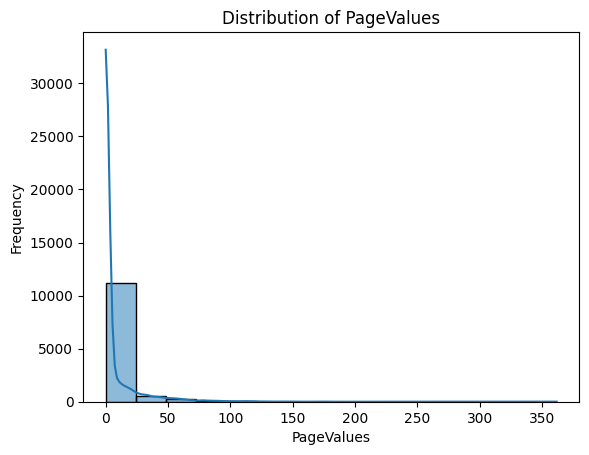

In [ ]:
sns.histplot(shop_df['PageValues'], kde=True)
plt.title('Distribution of PageValues')
plt.xlabel('PageValues')
plt.ylabel('Frequency')
plt.show()

- relationship between traffic and pagevalue

In [ ]:
corr = shop_df[['PageValues', 'TrafficType']].corr()
corr

,PageValues,TrafficType
PageValues,1.000000,0.012286
TrafficType,0.012286,1.000000


- relationship between vistitorType and pagevalue

In [ ]:
visitor_stats = shop_df.groupby('VisitorType')['PageValues'].agg(['mean', 'median', 'std', 'count'])
print(visitor_stats)


                        mean  median        std  count
VisitorType                                           
New_Visitor        10.778550     0.0  29.197231   1693
Other              19.090173     0.0  54.328142     81
Returning_Visitor   5.063768     0.0  15.501615  10431


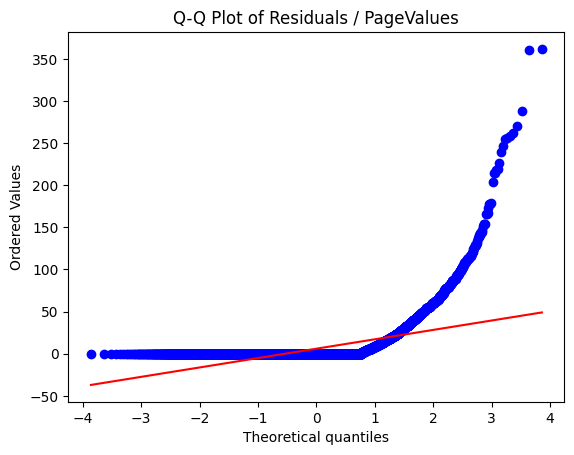

In [ ]:
residuals = shop_df['PageValues']
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals / PageValues')
plt.show()

In [ ]:
kruskal_test = kruskal(*[group['PageValues'].values for name, group in shop_df.groupby('VisitorType')])
print("Kruskal-Wallis Test:", kruskal_test)


Kruskal-Wallis Test: KruskalResult(statistic=6.207841451955822, pvalue=0.04487292261362119)


- Realtionship between pagevalues and region

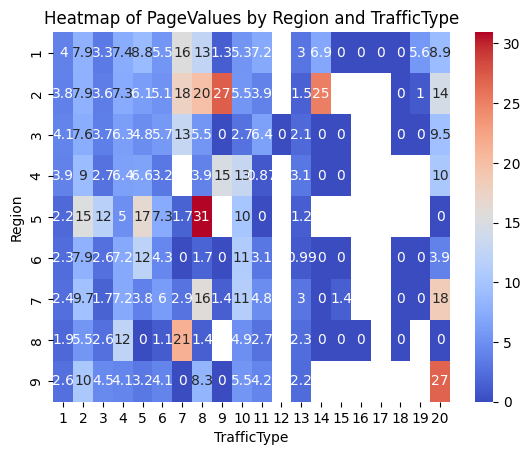

In [ ]:
pivot_table = shop_df.pivot_table(values='PageValues', index='Region', columns='TrafficType', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of PageValues by Region and TrafficType')
plt.show()


- Investigate user session lengths and their impact on conversion rates.

In [ ]:
shop_df['sessionlength'] = shop_df['Administrative'] + shop_df['Informational'] + shop_df['ProductRelated']

In [ ]:
shop_df['sessionlength'].max()

746

In [ ]:
shop_df['Session_category'] = pd.cut(shop_df['sessionlength'] , bins=[0,250,500,750,np.inf] , labels = [ 'Short', 'Medium', 'Long', 'Very Long'])

In [ ]:
shop_df['Session_category'].value_counts()

,count
Session_category,
Short,12106
Medium,86
Long,7
Very Long,0


Insight : Longer session lengths generally lead to higher conversion rates, with "Long" sessions having a conversion rate of 42.86%. However, "Very Long" sessions didn't result in conversions.

Recommendation: Focus on optimizing the user experience to maintain engagement during "Long" sessions without overstaying, as this might lead to frustration or indecision. Tools like personalized recommendations or limited-time offers could help convert these sessions.

In [ ]:
conversion_rate = shop_df.groupby('Session_category' , observed = False)['Revenue'].mean() * 100
print(conversion_rate)


Session_category
Short        15.488188
Medium       34.883721
Long         42.857143
Very Long          NaN
Name: Revenue, dtype: float64


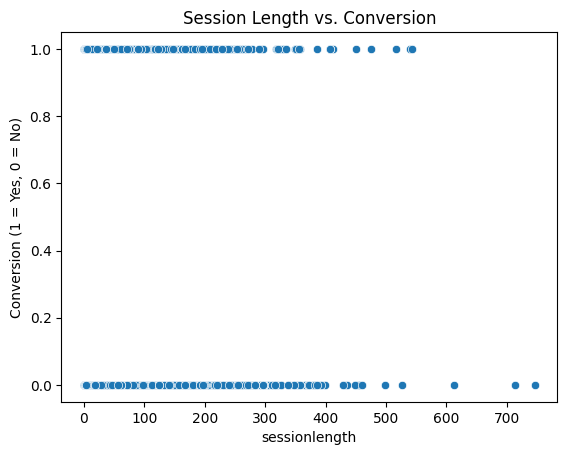

In [ ]:
sns.scatterplot(x='sessionlength', y='Revenue', data=shop_df)
plt.title('Session Length vs. Conversion')
plt.xlabel('sessionlength')
plt.ylabel('Conversion (1 = Yes, 0 = No)')
plt.show()


**Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.**

---



In [ ]:
grouped = shop_df.groupby(['VisitorType', 'OperatingSystems', 'Region'])

In [ ]:
conversion_rate = grouped['Revenue'].mean() * 100
conversion_rate.reset_index(name='ConversionRate')

,VisitorType,OperatingSystems,Region,ConversionRate
0,New_Visitor,1,1,26.744186
1,New_Visitor,1,2,34.146341
2,New_Visitor,1,3,14.942529
3,New_Visitor,1,4,29.729730
4,New_Visitor,1,5,33.333333
...,...,...,...,...
110,Returning_Visitor,8,4,0.000000
111,Returning_Visitor,8,5,0.000000
112,Returning_Visitor,8,6,0.000000
113,Returning_Visitor,8,7,0.000000


**Segment users based on TrafficType and analyze their engagement patterns and purchase probability.**

---



In [ ]:
grouped = shop_df.groupby('TrafficType')

In [ ]:
engagement_metrics = grouped[['PageValues', 'sessionlength']].mean()
print(engagement_metrics)

             PageValues  sessionlength
TrafficType                           
1              3.546226      35.078308
2              8.308613      41.774994
3              3.339503      28.428217
4              7.062934      31.458724
5              7.712489      21.842308
6              5.087703      32.164786
7             13.567345      32.600000
8             10.302436      29.498542
9              3.911694      17.414634
10             6.208230      35.751111
11             5.068642      27.344130
12             0.000000       3.000000
13             2.386929      35.571429
14             4.936097      85.076923
15             0.037454      18.378378
16             0.000000      18.333333
17             0.000000       4.000000
18             0.000000      16.300000
19             3.497520      41.352941
20            15.520252      23.036269


In [ ]:
conversion_rate = grouped['Revenue'].mean() * 100
print(conversion_rate)

TrafficType
1     10.971524
2     21.656865
3      8.941878
4     15.478424
5     21.538462
6     11.963883
7     30.000000
8     27.696793
9      9.756098
10    20.000000
11    19.028340
12     0.000000
13     5.906593
14    15.384615
15     0.000000
16    33.333333
17     0.000000
18     0.000000
19     5.882353
20    25.906736
Name: Revenue, dtype: float64


In [ ]:
engagement_metrics = grouped[['PageValues', 'sessionlength']].agg(['mean', 'median'])

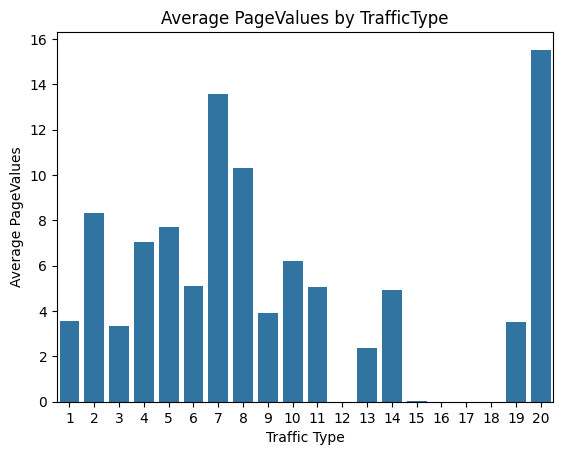

In [ ]:
sns.barplot(x=engagement_metrics.index, y=engagement_metrics['PageValues']['mean'])
plt.title('Average PageValues by TrafficType')
plt.xlabel('Traffic Type')
plt.ylabel('Average PageValues')
plt.show()

#Campaign Dataset

**EDA on various features and columns.**

---



In [ ]:
camp_df= pd.read_csv('/content/campaign - campaign.csv')

In [ ]:
camp_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [ ]:
camp_df.shape

(2239, 27)

In [ ]:
camp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [ ]:
camp_df['Dt_Customer'] =  pd.to_datetime(camp_df['Dt_Customer'], format='%m/%d/%y')

In [ ]:
camp_df['Income'] = camp_df['Income'].replace({'\$' : '' , ',' : ''} , regex= True ).astype(float)

In [ ]:
camp_df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
camp_df[camp_df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,0,3,7,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,CA
589,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,GER
898,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,2,6,5,0,0,0,0,0,0,US
996,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,GER
1095,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,0,2,7,0,0,0,0,0,0,AUS
1184,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,10,4,3,0,0,0,0,0,0,AUS


In [ ]:
camp_df['Income'] = camp_df['Income'].fillna(0)

In [ ]:
camp_df['Income'].isnull().sum()

0

**Feature Engineering**

---



In [ ]:
camp_df['Customer_Lifetime'] = (pd.to_datetime('today') - camp_df['Dt_Customer']).dt.days

- Binning

In [ ]:
camp_df['Recency_Binned'] = pd.cut(camp_df['Recency'], bins=[0, 30, 60, 90, 120, 180], labels=['Very Recent', 'Recent', 'Moderate', 'Old', 'Very Old'])


In [ ]:
camp_df['Recency_Binned'].value_counts()

,count
Recency_Binned,
Very Recent,695
Moderate,664
Recent,654
Old,198
Very Old,0


**Remove extreme values if required.**

---



In [ ]:
numerical_cols = camp_df.select_dtypes(include=np.number).columns

In [ ]:
numerical_cols

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Customer_Lifetime'],
      dtype='object')

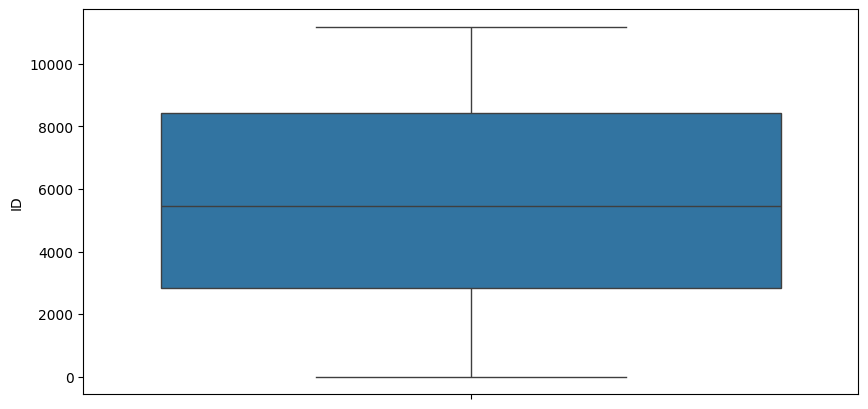

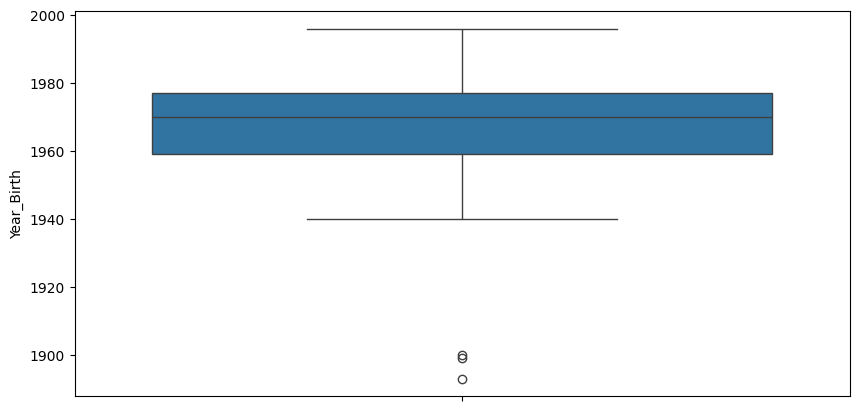

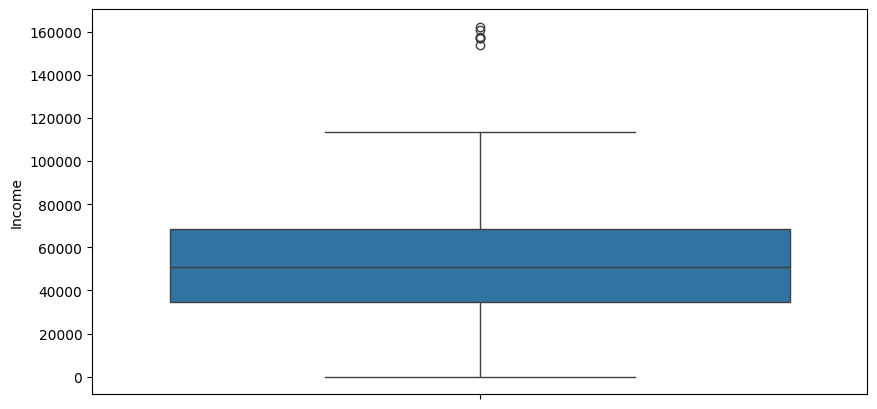

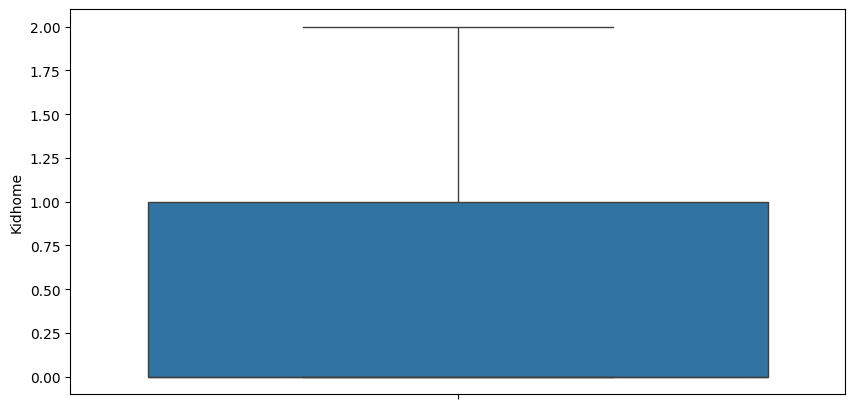

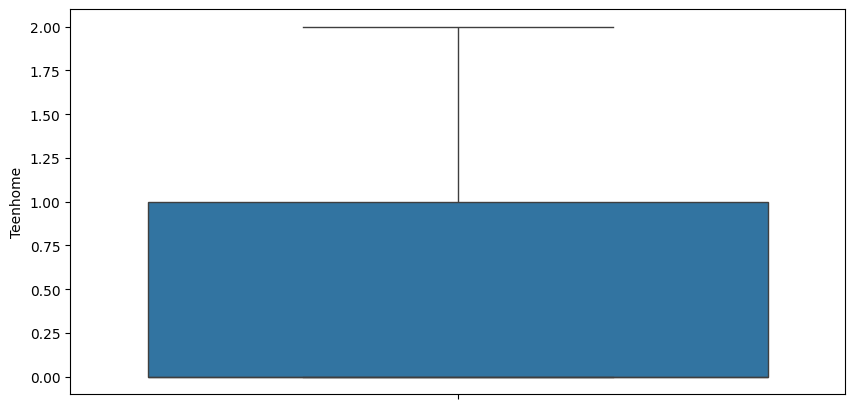

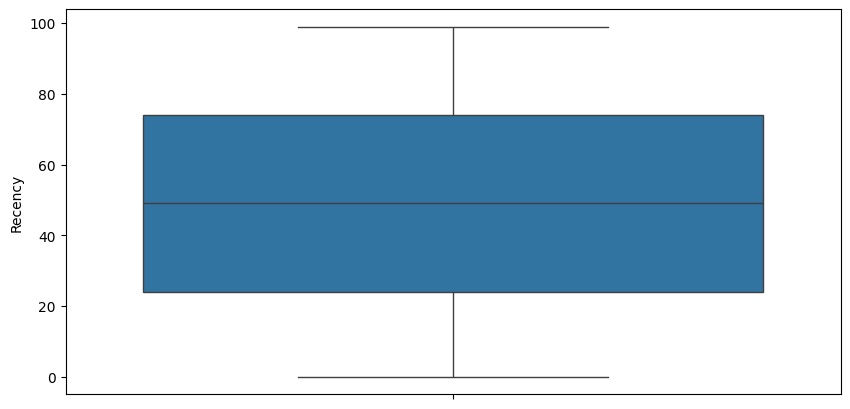

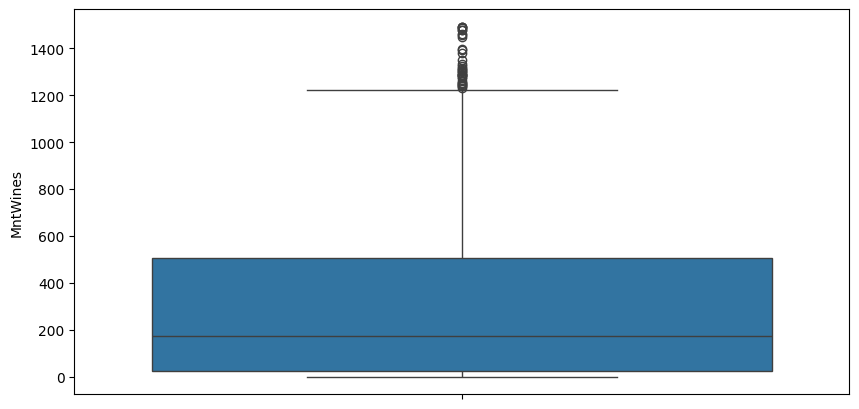

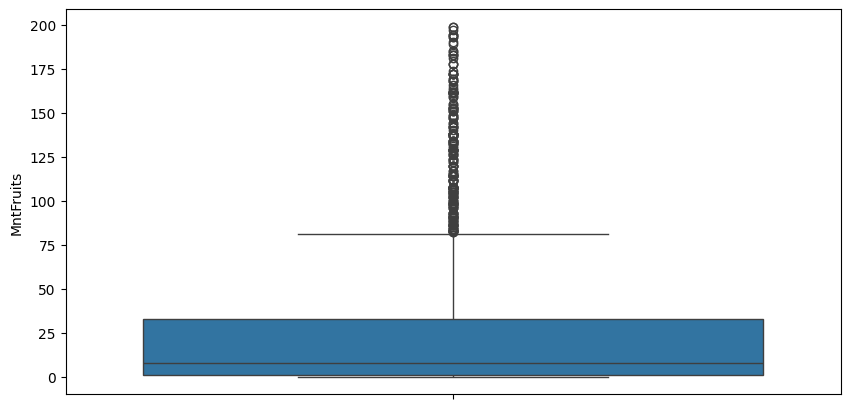

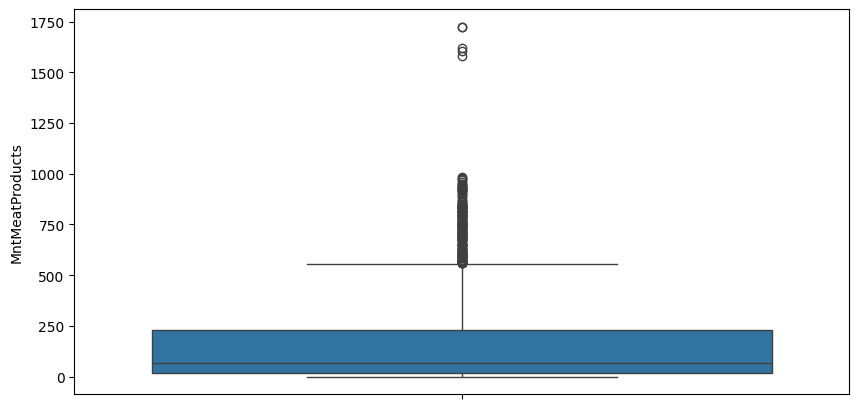

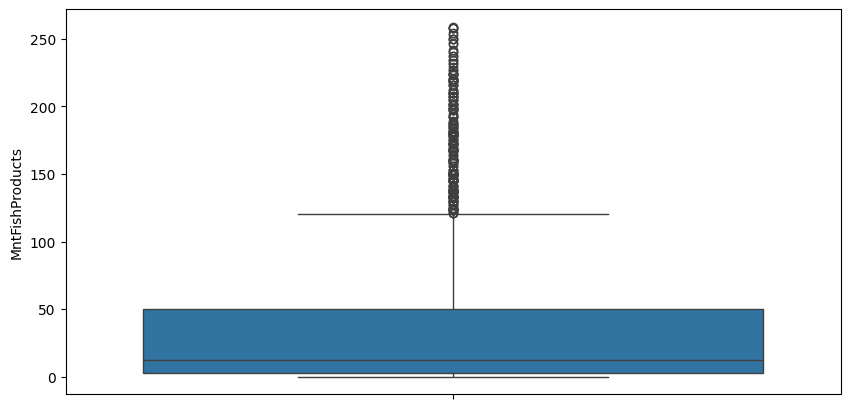

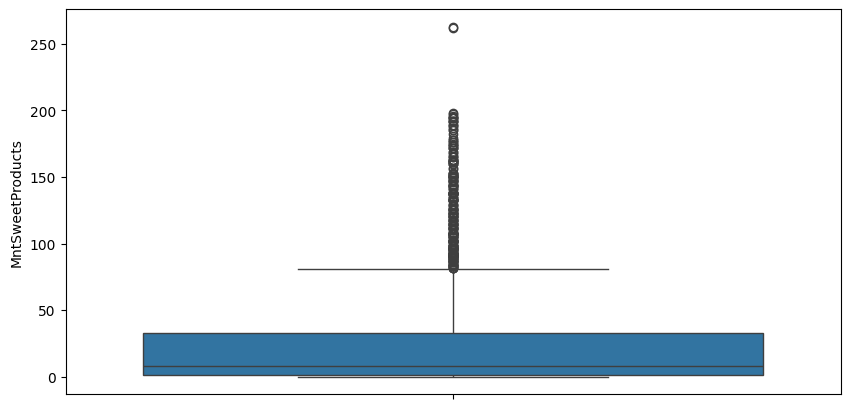

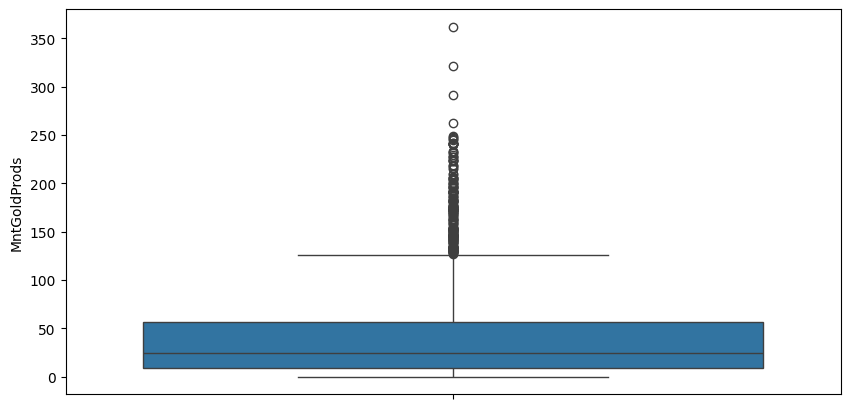

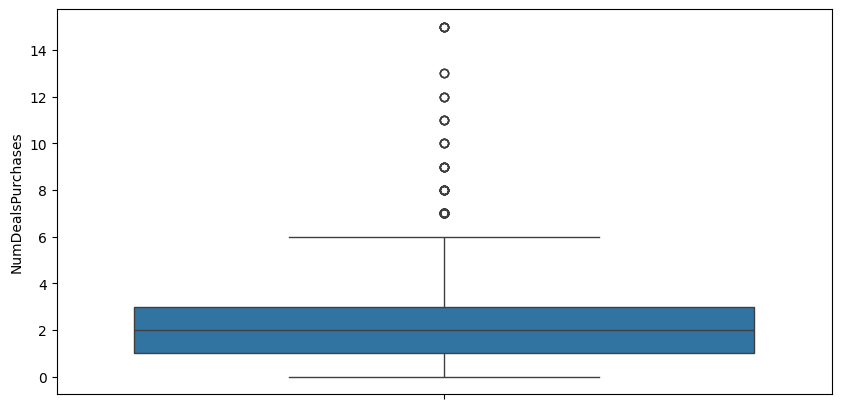

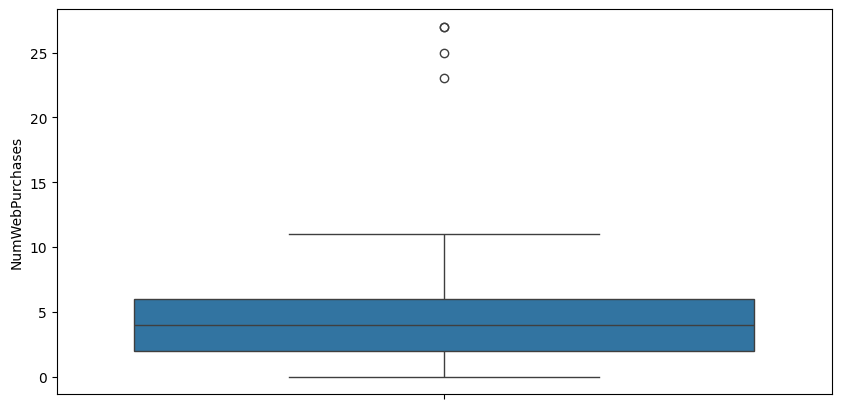

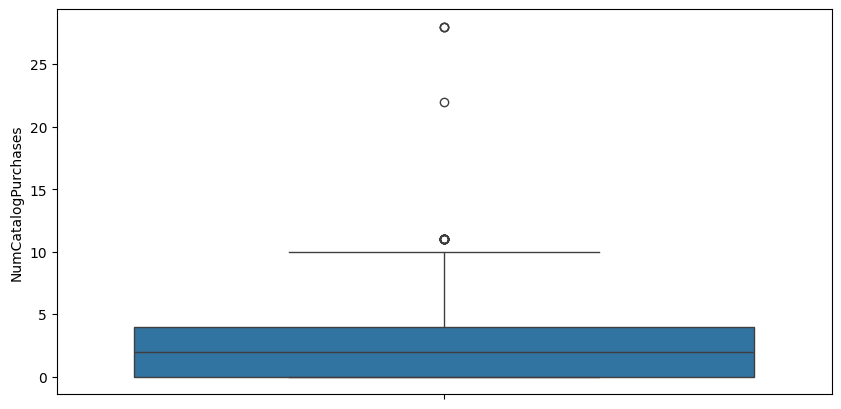

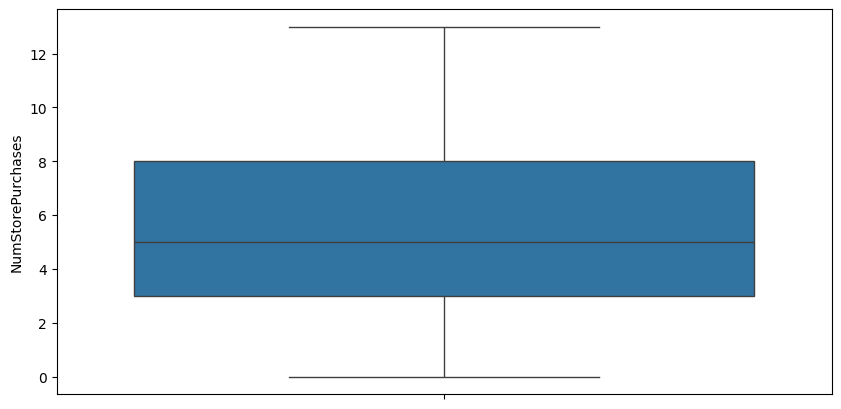

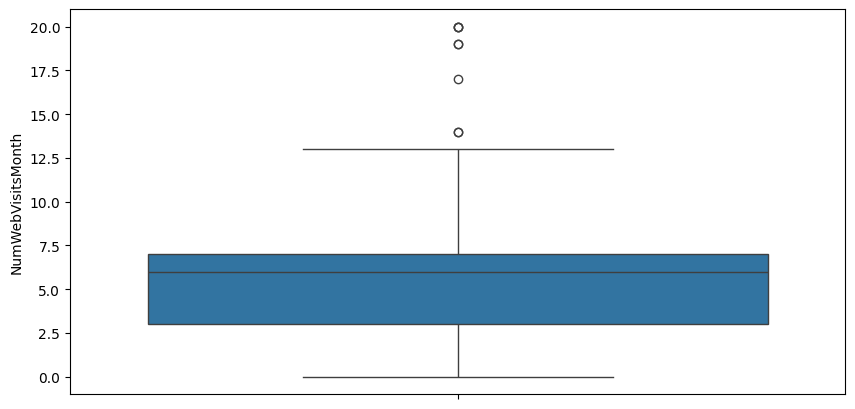

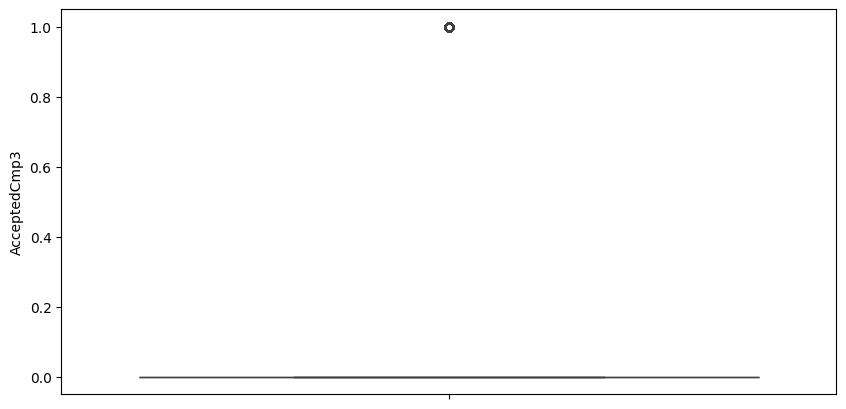

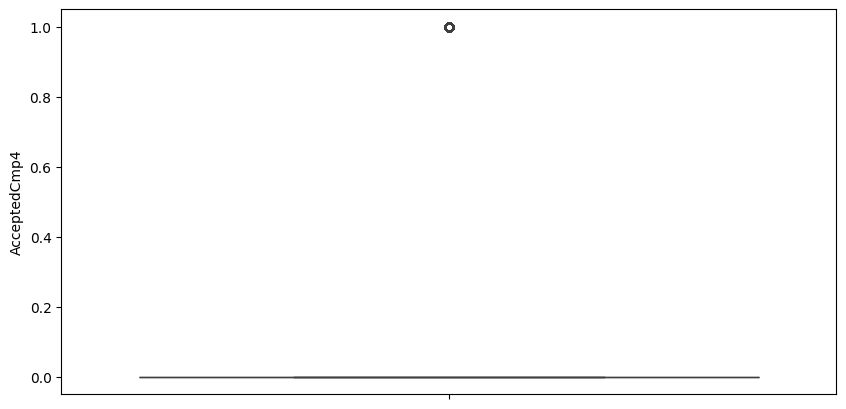

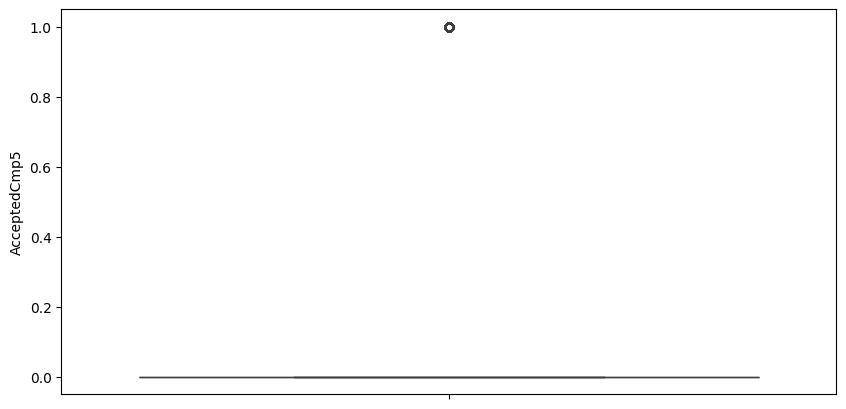

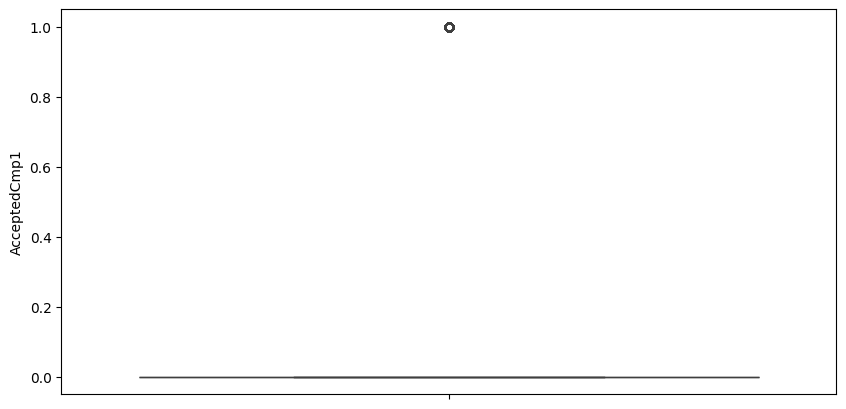

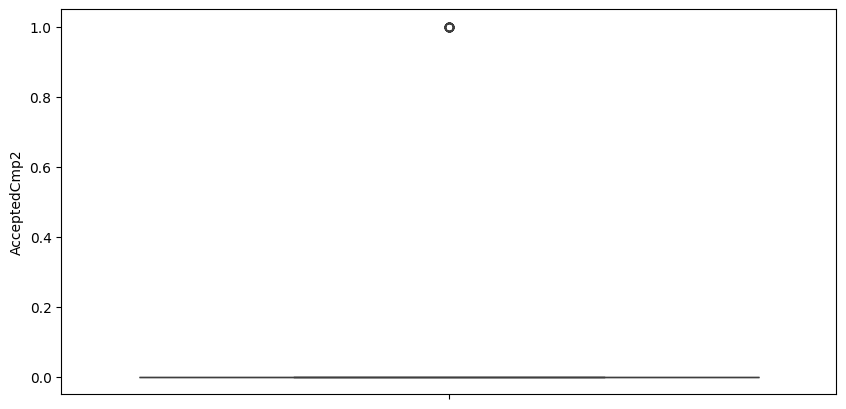

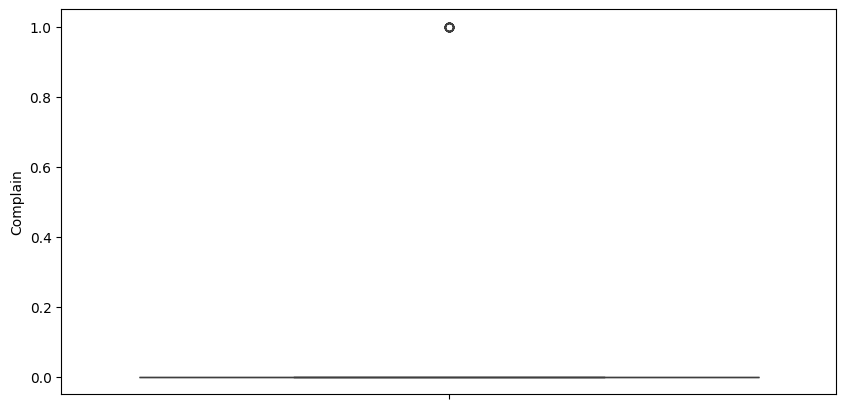

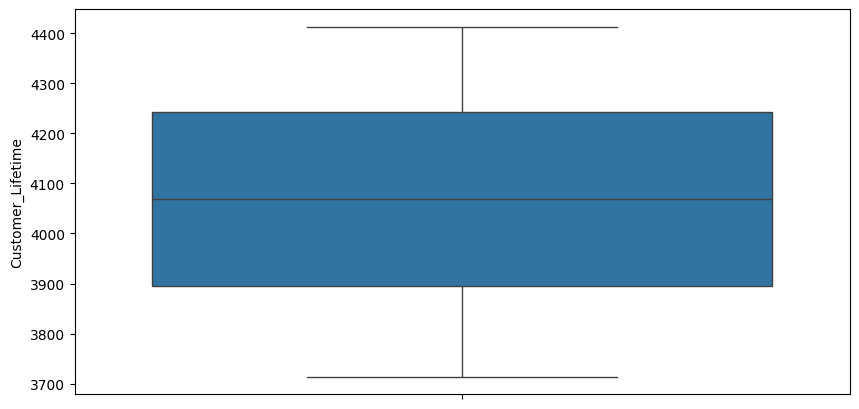

In [ ]:
for col in numerical_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(camp_df[col])
  plt.show()

In [ ]:
key_columns = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds'
]

In [ ]:
Q1 = camp_df[key_columns].quantile(0.25)
Q3 = camp_df[key_columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = ((camp_df[key_columns] < lower_bound) | (camp_df[key_columns] > upper_bound)).any(axis=1)


camp_df[outliers]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Customer_Lifetime,Recency_Binned
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,0,SP,3727,NaN
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,2,0,0,0,0,0,0,SP,3818,NaN
10,2079,1947,2n Cycle,Married,81044.0,0,0,2013-12-27,0,450,...,1,0,0,0,0,0,0,US,3898,NaN
12,10530,1959,PhD,Widow,67786.0,0,0,2013-12-07,0,431,...,1,0,0,0,0,0,0,IND,3918,NaN
14,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,1,0,0,0,0,0,0,SP,3981,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,5687,1980,Graduation,Divorced,81702.0,0,0,2012-09-23,98,563,...,3,0,0,0,0,0,0,CA,4358,Old
2222,2831,1976,Graduation,Together,78416.0,0,1,2014-06-27,99,453,...,3,0,0,0,0,0,0,SP,3716,Old
2225,1743,1974,Graduation,Single,69719.0,0,0,2014-05-26,99,273,...,1,0,0,0,0,0,0,SP,3748,Old
2237,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,IND,4291,Old


In [ ]:
for col in key_columns:
    median = camp_df[col].median()
    camp_df.loc[outliers, col] = median


**Hypothesis testing:**

---




- Is income of customers dependent on their education

One-way Anova

Assumptions

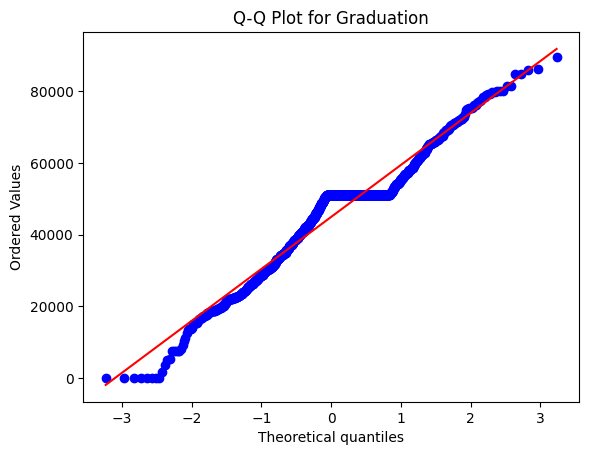

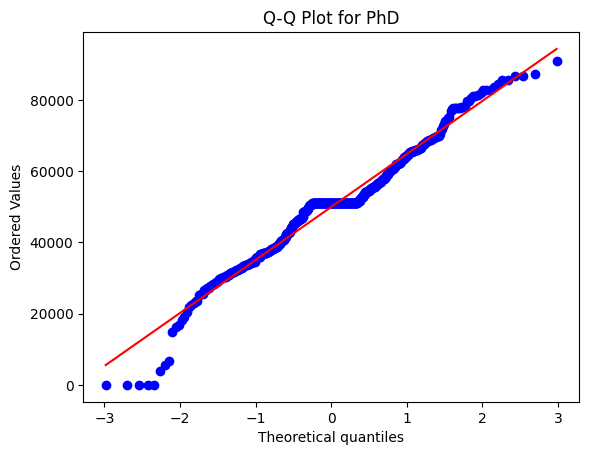

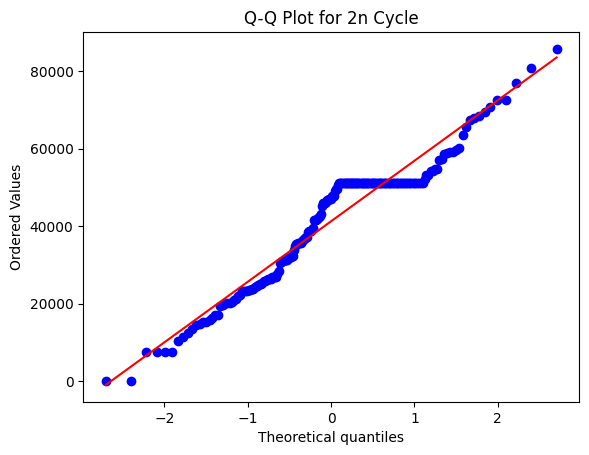

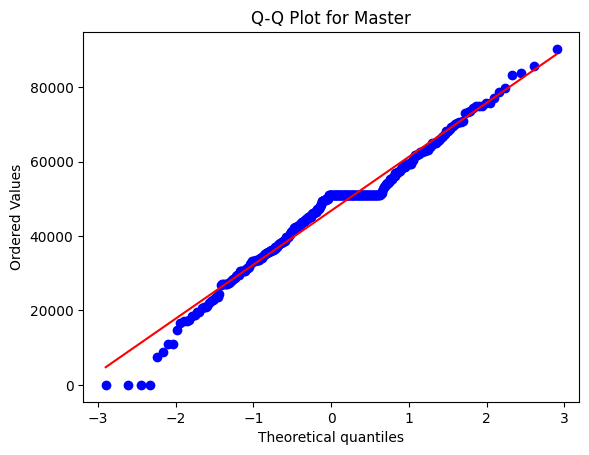

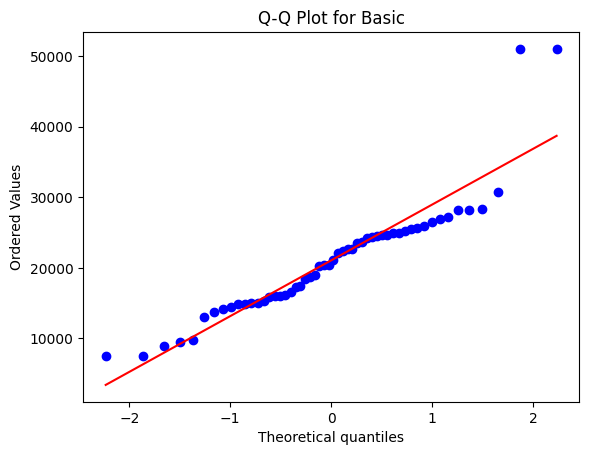

In [ ]:
for level in camp_df['Education'].unique():
    income_data = camp_df[camp_df['Education'] == level]['Income']
    stats.probplot(income_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {level}')
    plt.show()

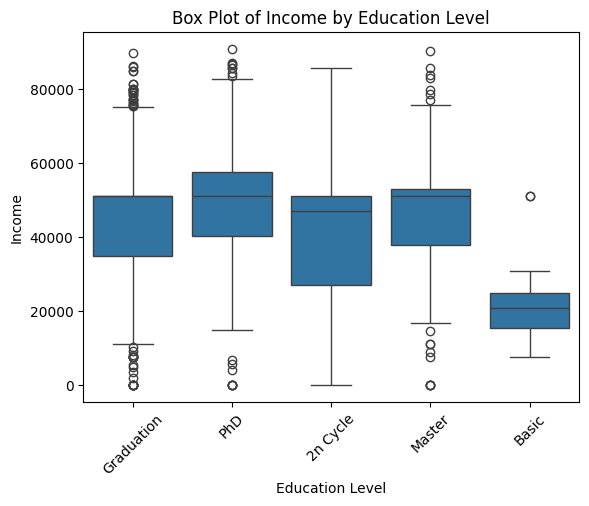

In [ ]:
sns.boxplot(x='Education', y='Income', data=camp_df)
plt.title('Box Plot of Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

In [ ]:
grouped  = camp_df.groupby('Education')['Income']

In [ ]:
Graduation = grouped.get_group('Graduation')
PhD = grouped.get_group('PhD')
Master = grouped.get_group('Master')
Basic = grouped.get_group('Basic')
twon_Year = grouped.get_group('2n Cycle')

In [ ]:
anova_result = stats.f_oneway(Graduation, PhD, Master, Basic, twon_Year)
anova_result

F_onewayResult(statistic=52.71479834410078, pvalue=1.7164204702604772e-42)

In [ ]:
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in income between education levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in income between education levels.")

Reject the null hypothesis. There is a significant difference in income between education levels.


**Do higher income people spend more (take in account spending in all categories together)**

---



In [ ]:
camp_df['Total_Spending'] = camp_df['MntWines'] + camp_df['MntFruits'] + camp_df['MntMeatProducts'] + camp_df['MntFishProducts'] + camp_df['MntSweetProducts']

In [ ]:
corr , p_value = stats.pearsonr(camp_df['Income'], camp_df['Total_Spending'])

In [ ]:
corr, p_value

(0.7091856965640443, 0.0)

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between income and total spending.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between income and total spending.")


Reject the null hypothesis. There is a significant correlation between income and total spending.


**Do couples spend more or less money on wine than people living alone (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')**

---



In [ ]:
camp_df['Living_Status'] = camp_df['Marital_Status'].apply(lambda x: 'Couple' if x in ['Married', 'Together'] else 'Alone')

In [ ]:
camp_df['Living_Status'].value_counts()

,count
Living_Status,
Couple,1443
Alone,796


In [ ]:
wine_spending_couple = camp_df[camp_df['Living_Status'] == 'Couple']['MntWines']
wine_spending_alone = camp_df[camp_df['Living_Status'] == 'Alone']['MntWines']

In [ ]:

h_stat, p_value = stats.kruskal(wine_spending_couple, wine_spending_alone)


In [ ]:
h_stat, p_value

(0.5516579031462469, 0.45764106602403265)

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in wine spending between couples and people living alone.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in wine spending between couples and people living alone.")


Fail to reject the null hypothesis. There is no significant difference in wine spending between couples and people living alone.


**Are people with lower income are more attracted towards campaign or simply put accept more campaigns. ( create two income brackets one below median , other above median income and create a column which tells if they have ever accepted any campaign)**

---



In [ ]:
medium_income = camp_df['Income'].median()

In [ ]:
camp_df['Income_Category'] = camp_df['Income'].apply(lambda x: 'Low Income' if x < medium_income else 'High Income')

In [ ]:
camp_df['Total_Acceptency'] = camp_df['AcceptedCmp1'] + camp_df['AcceptedCmp2'] + camp_df['AcceptedCmp3'] + camp_df['AcceptedCmp4'] + camp_df['AcceptedCmp5']

In [ ]:
camp_df['Accepted_any_campaign'] =camp_df.groupby('ID')['Total_Acceptency'].transform(lambda x: 1 if x.sum() > 0  else  0 )

In [ ]:
acceptance_rate = camp_df.groupby('Income_Category')['Accepted_any_campaign'].mean() * 100

In [ ]:
acceptance_rate

,Accepted_any_campaign
Income_Category,
High Income,30.901288
Low Income,9.590317


Approximately 31% of high-income individuals have accapted at least one campaign.

This suggests that individuals with higher income are more likely to accept campaigns. This could be because they have more disposable income, feel more targeted by the campaigns, or simply because the campaigns are better tailored to their preferences.